In [1]:
from dotenv import load_dotenv
import os
load_dotenv()
PINECONE_API_KEY = os.getenv('PINECONE_API_KEY')

# index 생성

In [2]:
from pinecone import Pinecone
# 클라이언트 생성
pinecone_client = Pinecone(api_key=PINECONE_API_KEY)

In [3]:
pinecone_client

In [ ]:
# 인덱스 create
from pinecone import ServerlessSpec
pinecone_client.create_index(
    name='embedding-3d',
    dimension=3,
    metric='cosine',
    spec= ServerlessSpec(
        cloud='aws',
        region='us-east-1'
    )
) 

{
    "name": "embedding-3d",
    "metric": "cosine",
    "host": "embedding-3d-2wxeig8.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 3,
    "deletion_protection": "disabled",
    "tags": null
}

In [4]:
index = pinecone_client.Index('embedding-3d')
index

c:\Users\Admin\miniconda3\envs\prompting_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

In [6]:
for ids in index.list(namespace='embedding-3d-ns1'): # default: namespace='embedding-3d-ns1
    print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


In [15]:
# pinecone data 형식
[{'id': 'vec1', 'values' : [1.0, 1.5, 2.0], 'metadata' : {'genre' : 'drama'}},
 {'id': 'vec2', 'values' : [2.0, 1.5, 0.5], 'metadata' : {'genre' : 'action'}},
 {'id': 'vec3', 'values' : [0.1, 0.3, 0.5], 'metadata' : {'genre' : 'drama'}},
 {'id': 'vec4', 'values' : [1.0, 2.5, 3.0], 'metadata' : {'genre' : 'action'}},
 {'id': 'vec5', 'values' : [3.0, 1.2, 1.3], 'metadata' : {'genre' : 'action'}},
 {'id': 'vec6', 'values' : [0.3, 1.1, 2.5], 'metadata' : {'genre' : 'drama'}}
 ]

[{'id': 'vec1', 'values': [1.0, 1.5, 2.0], 'metadata': {'genre': 'drama'}},
 {'id': 'vec2', 'values': [2.0, 1.5, 0.5], 'metadata': {'genre': 'action'}},
 {'id': 'vec3', 'values': [0.1, 0.3, 0.5], 'metadata': {'genre': 'drama'}},
 {'id': 'vec4', 'values': [1.0, 2.5, 3.0], 'metadata': {'genre': 'action'}},
 {'id': 'vec5', 'values': [3.0, 1.2, 1.3], 'metadata': {'genre': 'action'}},
 {'id': 'vec6', 'values': [0.3, 1.1, 2.5], 'metadata': {'genre': 'drama'}}]

In [14]:
index.upsert(
    vectors=[{'id': 'vec1', 'values' : [1.0, 1.5, 2.0], 'metadata' : {'genre' : 'drama'}},
    {'id': 'vec2', 'values' : [2.0, 1.5, 0.5], 'metadata' : {'genre' : 'action'}},
    {'id': 'vec3', 'values' : [0.1, 0.3, 0.5], 'metadata' : {'genre' : 'drama'}},
    {'id': 'vec4', 'values' : [1.0, 2.5, 3.0], 'metadata' : {'genre' : 'action'}},
    {'id': 'vec5', 'values' : [3.0, 1.2, 1.3], 'metadata' : {'genre' : 'action'}},
    {'id': 'vec6', 'values' : [0.3, 1.1, 2.5], 'metadata' : {'genre' : 'drama'}}
    ],
    namespace='embedding-3d-ns1'
        
)# update _insert

{'upserted_count': 6}

In [16]:
index.describe_index_stats()

{'dimension': 3,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'embedding-3d-ns1': {'vector_count': 6}},
 'total_vector_count': 6,
 'vector_type': 'dense'}

In [7]:
# id list
for ids in index.list(namespace='embedding-3d-ns1'): # default: namespace='embedding-3d-ns1
    print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


# query

In [8]:
response = index.query(
    namespace='embedding-3d-ns1',
    vector=[0.1,0.4,0.7], # 질의백터
    top_k=3, # 출력 개수
    include_values=True,
    include_metadata=True,
    filter={'genre': {'$eq':'drama'}}
)
response

{'matches': [{'id': 'vec3',
              'metadata': {'genre': 'drama'},
              'score': 1.00008953,
              'values': [0.1, 0.3, 0.5]},
             {'id': 'vec6',
              'metadata': {'genre': 'drama'},
              'score': 0.99550879,
              'values': [0.3, 1.1, 2.5]},
             {'id': 'vec1',
              'metadata': {'genre': 'drama'},
              'score': 0.961182,
              'values': [1.0, 1.5, 2.0]}],
 'namespace': 'embedding-3d-ns1',
 'usage': {'read_units': 1}}

In [ ]:
# fetch

In [9]:
ns = 'embedding-3d-ns1'
for ids in index.list(namespace=ns):
    print(ids)

['vec1', 'vec2', 'vec3', 'vec4', 'vec5', 'vec6']


In [12]:
from itertools import chain
all_ids = list(chain.from_iterable(index.list(namespace=ns)))
resp = index.fetch(ids=all_ids, namespace=ns)
resp

FetchResponse(namespace='embedding-3d-ns1', vectors={'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None), 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.0], metadata={'genre': 'action'}, sparse_values=None), 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None), 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None), 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}, usage={'read_units': 1})

In [13]:
resp.vectors

{'vec5': Vector(id='vec5', values=[3.0, 1.2, 1.3], metadata={'genre': 'action'}, sparse_values=None),
 'vec4': Vector(id='vec4', values=[1.0, 2.5, 3.0], metadata={'genre': 'action'}, sparse_values=None),
 'vec3': Vector(id='vec3', values=[0.1, 0.3, 0.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec2': Vector(id='vec2', values=[2.0, 1.5, 0.5], metadata={'genre': 'action'}, sparse_values=None),
 'vec6': Vector(id='vec6', values=[0.3, 1.1, 2.5], metadata={'genre': 'drama'}, sparse_values=None),
 'vec1': Vector(id='vec1', values=[1.0, 1.5, 2.0], metadata={'genre': 'drama'}, sparse_values=None)}

In [14]:
for vid, v in resp.vectors.items():
    vid, v.values

In [ ]:
# page

In [15]:
for id_page in index.list(namespace=ns):
    resp = index.fetch(ids=id_page, namespace=ns)
    for vid, v in resp.vectors.items():
        print(vid,v.values)

vec6 [0.3, 1.1, 2.5]
vec2 [2.0, 1.5, 0.5]
vec4 [1.0, 2.5, 3.0]
vec5 [3.0, 1.2, 1.3]
vec1 [1.0, 1.5, 2.0]
vec3 [0.1, 0.3, 0.5]


In [ ]:
# 새로운 쿼리벡터 추가하기

In [18]:
ids = list(resp.vectors.keys())
values = [vec.values for vec in resp.vectors.values()]

In [19]:
ids.append('qv')
values.append([0.1,0.3,0.7]) # dimension 일치

In [ ]:
# 시각화
# pip install matplotlib

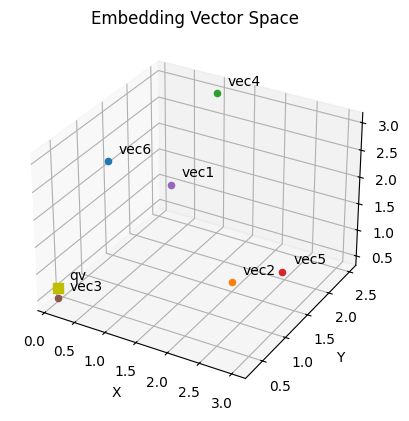

In [21]:
import matplotlib.pyplot as plt

# 3D 플롯을 생성합니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 각 벡터의 ID와 값을 사용하여 3D 공간에 점을 그립니다.
for i, id in enumerate(ids):
    if id == "qv":
        # 쿼리 벡터는 노란색 사각형으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id, color='y', s=50, marker='s')
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)
    else:
        # 나머지 벡터는 기본 색상으로 표시합니다.
        ax.scatter(values[i][0], values[i][1], values[i][2], label=id)
        ax.text(values[i][0] + 0.1, values[i][1] + 0.1, values[i][2] + 0.1, id)

# 축 레이블과 제목을 설정합니다.
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Embedding Vector Space')

# 플롯을 표시합니다.
plt.show()

1. "quickstart" 서버리스 인덱스 생성
2. dim:1024,

# 임베딩 미션

In [ ]:
data = [
    {"id": "vec1", "text": "사과는 달콤하고 아삭한 식감으로 유명한 인기 있는 과일입니다."},
    {"id": "vec2", "text": "애플이라는 기술 회사는 아이폰과 같은 혁신적인 제품으로 유명합니다."},
    {"id": "vec3", "text": "많은 사람들이 건강한 간식으로 사과를 즐겨 먹습니다."},
    {"id": "vec4", "text": "애플 주식회사는 세련된 디자인과 사용자 친화적인 인터페이스로 기술 산업을 혁신했습니다."},
    {"id": "vec5", "text": "하루에 사과 하나면 의사를 멀리할 수 있다는 속담이 있습니다."},
    {"id": "vec6", "text": "애플 컴퓨터 회사는 1976년 4월 1일 스티브 잡스, 스티브 워즈니악, 로널드 웨인에 의해 파트너십으로 설립되었습니다."}
]

임베딩 모델
- multilingual-e5-large
upsert()
describe_index_stats()
query_vector : " 애플이라는 기술 회사에 대해 알려주세요."
index.query()